In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rosbag_to_csv

In [325]:
dir_name

'/home/kogure/pilot-auto.xx1/src/autoware_tools/control_data_collecting_tool/scripts/calibration/calibration_test/brake/acceleration_accuracy_brake_0.2_20241223-163857'

In [326]:
file = "acceleration_accuracy_brake_0.2_20241223-163857"
dir_name = '/home/kogure/pilot-auto.xx1/src/autoware_tools/control_data_collecting_tool/scripts/calibration/calibration_test/brake/' + file
#dir_name = "/home/kogure/pilot-auto.xx1/src/autoware_tools/control_data_collecting_tool/scripts/calibration/check_data/brake/acceleration_accuracy_brake_-1.0_20241226-102443"
rosbag_to_csv.rosbag_to_csv(dir_name)


There are  1937 messages in  /control/command/actuation_cmd

There are  1935 messages in  /control/command/control_cmd

There are  602 messages in  /control/command/gear_cmd

There are  1621 messages in  /vehicle/status/steering_status

There are  1621 messages in  /vehicle/status/gear_status

There are  1620 messages in  /vehicle/status/control_mode

There are  1717 messages in  /sensing/imu/tamagawa/imu_raw

There are  1717 messages in  /sensing/imu/imu_data

There are  0 messages in  /control/control_validator/virtual_wall

There are  0 messages in  /control/control_validator/output/markers

There are  0 messages in  /control/control_validator/debug/marker

There are  0 messages in  /control/control_validator/validation_status

There are  0 messages in  /vehicle/raw_vehicle_cmd_converter/debug/steer_pid

There are  1618 messages in  /vehicle/status/velocity_status

There are  1607 messages in  /vehicle/status/hazard_lights_status

There are  598 messages in  /control/vehicle_cmd_ga

In [327]:
velocity_csv = "vehicle_status_velocity_status.csv"
actuation_cmd_csv = "control_command_actuation_cmd.csv"
control_cmd_csv = "control_command_control_cmd.csv"

In [328]:
velocity_df = pd.read_csv(dir_name + "/" + velocity_csv).to_numpy()
vel_stamp = velocity_df[:,0] +  1e-9 * velocity_df[:,1]
velocity = velocity_df[:,3]
vel_stamp = np.array(vel_stamp, dtype=float)
velocity = np.array(velocity, dtype=float)

actuation_cmd_df = pd.read_csv(dir_name + "/" + actuation_cmd_csv).to_numpy()
actuation_cmd_stamp = actuation_cmd_df[:,0] +  1e-9 * actuation_cmd_df[:,1]
accel = actuation_cmd_df[:,3]
brake = actuation_cmd_df[:,4]

control_cmd_df = pd.read_csv(dir_name + "/" + control_cmd_csv).to_numpy()
control_cmd_stamp = control_cmd_df[:,0] +  1e-9 * control_cmd_df[:,1]
control_cmd = control_cmd_df[:,16]

In [329]:
pedal = 0.2

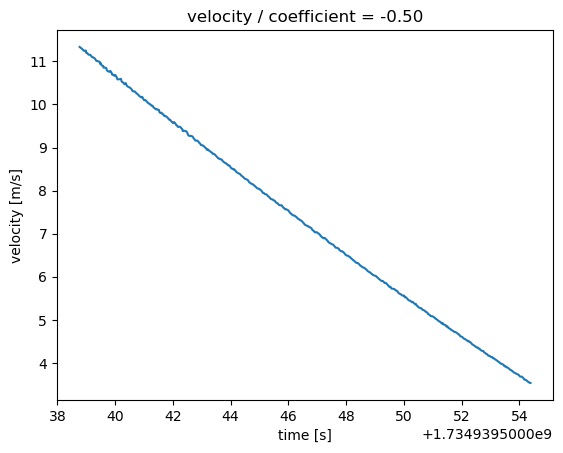

In [330]:
#velocity
N = 1200
a, b = np.polyfit(vel_stamp[:-N], velocity[:-N], 1)

plt.plot(vel_stamp[:-N], velocity[:-N])
plt.title(f"velocity / coefficient = {a:.2f}")
plt.xlabel("time [s]")
plt.ylabel("velocity [m/s]")
plt.savefig("velocity : brake pedal = " + str(pedal) + ".png")
plt.show()

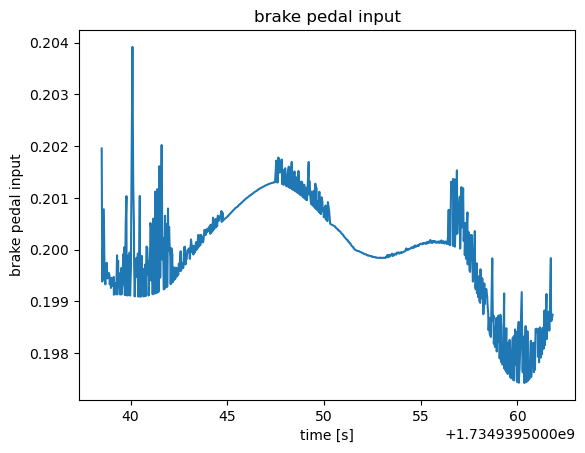

In [331]:
#brake
plt.plot(actuation_cmd_stamp[:-N], brake[:-N])
plt.title(f"brake pedal input")
plt.xlabel("time [s]")
plt.ylabel("brake pedal input")
plt.savefig("brake pedal input = " + str(pedal) + ".png")
plt.show()

In [323]:
a, b = np.polyfit(vel_stamp[:-N], velocity[:-N], 1)

In [295]:
print(a)

-1.105088441108723


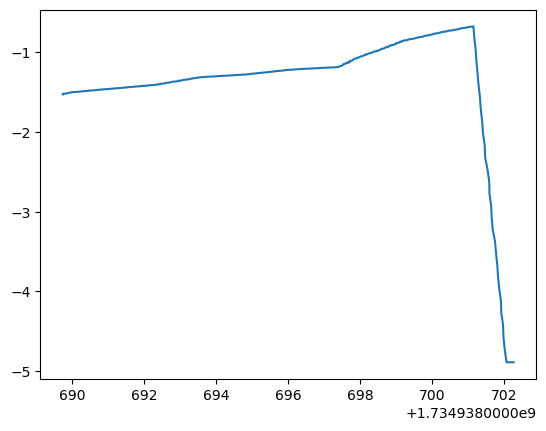

In [289]:
#control_cmd
plt.plot(control_cmd_stamp, control_cmd)

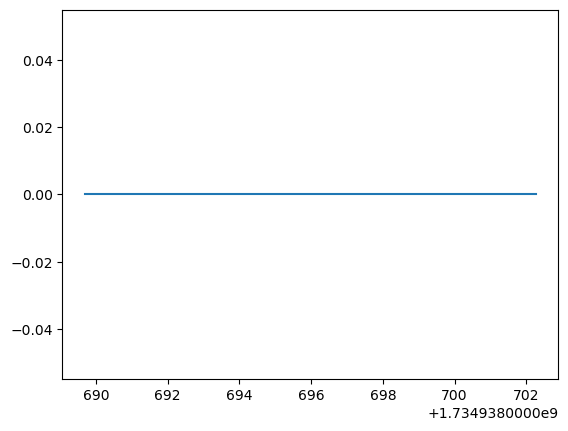

In [290]:
#accel
plt.plot(actuation_cmd_stamp, accel)

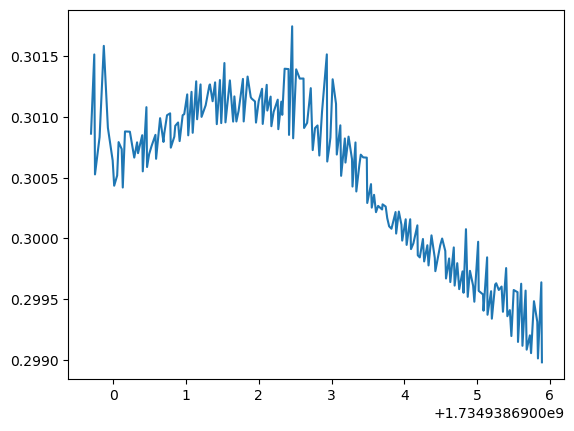

In [296]:
#brake
plt.plot(actuation_cmd_stamp[:-N], brake[:-N])